In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from plotter import P_over_E_parameter
from events import list_of_params
from functions import ic_params

In [2]:
E_range = np.logspace(np.log10(500),4,100)
params = ic_params.copy()
anti=True
params.update({'theta_14': np.arcsin(np.sqrt(0.02)), 'theta_24': np.arcsin(np.sqrt(0.063)), 'dm_41':0.32, 'e_mm': -4.3, 'e_tt': -4})
params = [params]
zenith = -0.8

Pmm_nsi = P_over_E_parameter('m',params,E=E_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
Pmm = P_over_E_parameter('m',params,E=E_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
Pmm_3gen = P_over_E_parameter('m',params,E=E_range, ndim=3, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)

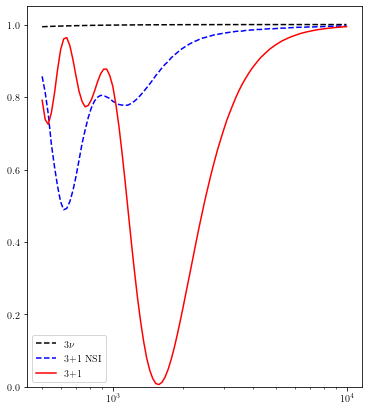

In [3]:
fig, ax = plt.subplots(1, figsize=(6,7))
plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
plt.plot(E_range, Pmm_nsi, label='3+1 NSI', ls='dashed', c='blue')
plt.plot(E_range, Pmm, label='3+1',c='red')
plt.xscale('log')
plt.ylim((0,1.05))
plt.legend()
